# Cake eating - optimized

In [192]:
import tensorflow as tf
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm         # tqdm is a nice library to visualize ongoing loops
import datetime
# followint lines are used for indicative typing
from typing import Tuple
class Vector: pass

(200, 1) (200, 1)


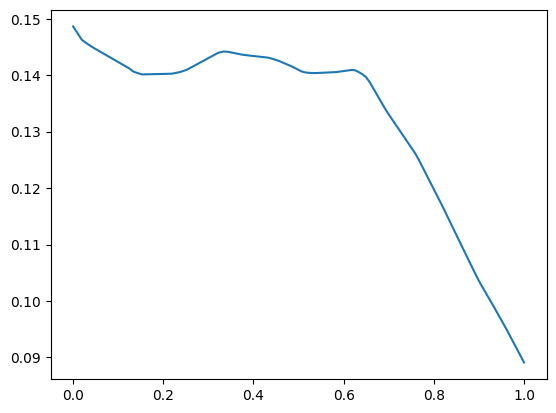

In [234]:
# Model parameters
β = 0.9 
xmin=0.0001
xmax=1.0
min_FB = lambda a,b: a+b-tf.sqrt(a**2+b**2)
layers = [
    tf.keras.layers.Normalization(axis=-1, input_dim=1, mean=None, variance=None, invert=False),
    tf.keras.layers.Dense(64, activation='leaky_relu',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(64, activation='leaky_relu',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(64, activation='leaky_relu',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
]
perceptron = tf.keras.Sequential(layers)
λ=2
def model(x:Vector)->Tuple[Vector]:
    c = perceptron(x)
    return c

xvec = np.power(np.linspace(xmin**(1/λ),xmax**(1/λ),200,dtype='float32'),λ).reshape(-1,1)
print(xvec.shape, model(xvec).shape)
plt.plot(xvec, model(xvec), label = 'c(x)')

In [235]:
def residuals(x:Vector):
    c=model(x)
    xp=x-c
    cp=model(xp)
    R = min_FB(x-c,c**(-1)-β*cp**(-1))
    return R

residuals(xvec);

def J(n):
    x = tf.random.uniform(shape=(n,1),minval=xmin,maxval=xmax)
    R = residuals(x)
    R_squared = R*R
    return tf.reduce_mean(R_squared)

n = 5000
v = J(n)
v.numpy()

0.14708848

In [236]:
θ = perceptron.trainable_variables
print(str(θ)[:1000])

[<tf.Variable 'dense_104/kernel:0' shape=(1, 64) dtype=float32, numpy=
array([[ 0.18889314, -0.2563056 ,  0.28267157,  0.28711152,  0.01342753,
        -0.01567668,  0.16954961, -0.06183796, -0.1310641 , -0.23843706,
         0.16044113, -0.27836898,  0.16016594,  0.2055251 , -0.2584477 ,
        -0.06841189, -0.00883359,  0.12721792,  0.03613806, -0.13966808,
        -0.2441894 ,  0.22679114, -0.2029765 ,  0.2392391 ,  0.17524603,
         0.07473075,  0.10872772,  0.04900658,  0.26105273, -0.22253188,
         0.01376632,  0.14225197, -0.17787224,  0.07639638, -0.08345157,
        -0.21004865, -0.17306063, -0.24862702,  0.0716081 ,  0.2577663 ,
         0.25696117,  0.15724745, -0.0204809 ,  0.16683194,  0.0961498 ,
        -0.21163681,  0.0851889 , -0.05130038,  0.21903348,  0.21613878,
         0.14305738, -0.29902223,  0.03057593,  0.14202118,  0.06873271,
        -0.17852229,  0.03087705,  0.27030307,  0.1021814 ,  0.12791008,
         0.25159514, -0.03912288,  0.12199697, -0.179

In [237]:
from tensorflow.keras.optimizers import Adam, SGD
variables = perceptron.trainable_variables
optimizer = SGD()
#optimizer.lr.assign(0.00001)

In [238]:
@tf.function
def training_step():
    
    with tf.GradientTape() as tape:
        xx = J(n)
        
    grads = tape.gradient(xx,θ)
    optimizer.apply_gradients(zip(grads,θ))
    
    return xx

def train_me(K):
    vals=[]
    for k in tqdm(tf.range(K)):
        val=training_step()
        vals.append(val.numpy())
    return vals

In [ ]:
results = train_me(5000)

 88%|██████████████████████████████████▏    | 4385/5000 [01:19<00:10, 57.90it/s]

In [253]:
results = train_me(500)

100%|█████████████████████████████████████████| 500/500 [00:08<00:00, 57.94it/s]


In [ ]:
plt.plot(np.sqrt(results))
plt.xscale('log')
plt.yscale('log')
plt.grid()

In [1]:
plt.plot(xvec,model(xvec),label='Solved c(x)')
plt.plot(xvec,(1-β)*xvec, 'bo', label='True c(x)')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

NameError: name 'plt' is not defined